In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [7]:
import requests
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | marfino
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | severo-kurilsk
Processing Record 6 of Set 1 | la palma
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | farafangana
Processing Record 10 of Set 1 | jacareacanga
Processing Record 11 of Set 1 | rayagada
Processing Record 12 of Set 1 | pacific grove
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | oktyabrskoye
Processing Record 16 of Set 1 | mogok
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | east london
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | nesebar

Processing Record 34 of Set 4 | bolshoye murashkino
Processing Record 35 of Set 4 | karamea
City not found. Skipping...
Processing Record 36 of Set 4 | veraval
Processing Record 37 of Set 4 | pisco
Processing Record 38 of Set 4 | rolim de moura
City not found. Skipping...
Processing Record 39 of Set 4 | palmer
Processing Record 40 of Set 4 | bowen
Processing Record 41 of Set 4 | tamasopo
Processing Record 42 of Set 4 | kibala
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | phan rang
City not found. Skipping...
Processing Record 45 of Set 4 | riyadh
Processing Record 46 of Set 4 | koksovyy
Processing Record 47 of Set 4 | urumqi
Processing Record 48 of Set 4 | hermanus
Processing Record 49 of Set 4 | cayenne
Processing Record 50 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | bonfim
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | oia
Processing Record 5 of Set 5 |

Processing Record 22 of Set 8 | senmonorom
City not found. Skipping...
Processing Record 23 of Set 8 | costisa
Processing Record 24 of Set 8 | kousseri
Processing Record 25 of Set 8 | margherita
Processing Record 26 of Set 8 | mafeteng
Processing Record 27 of Set 8 | risor
Processing Record 28 of Set 8 | kenai
Processing Record 29 of Set 8 | canas
Processing Record 30 of Set 8 | hofn
Processing Record 31 of Set 8 | chapais
Processing Record 32 of Set 8 | kinna
Processing Record 33 of Set 8 | shenjiamen
Processing Record 34 of Set 8 | ancud
Processing Record 35 of Set 8 | balod
Processing Record 36 of Set 8 | kyra
Processing Record 37 of Set 8 | mount gambier
Processing Record 38 of Set 8 | sao jose da coroa grande
Processing Record 39 of Set 8 | inongo
Processing Record 40 of Set 8 | yazoo city
Processing Record 41 of Set 8 | bulgan
Processing Record 42 of Set 8 | tjome
Processing Record 43 of Set 8 | iskateley
Processing Record 44 of Set 8 | severodvinsk
Processing Record 45 of Set 8 

Processing Record 12 of Set 12 | virginia beach
Processing Record 13 of Set 12 | andenes
Processing Record 14 of Set 12 | artyk
City not found. Skipping...
Processing Record 15 of Set 12 | boende
Processing Record 16 of Set 12 | scarborough
Processing Record 17 of Set 12 | methoni
Processing Record 18 of Set 12 | yermakovskoye
Processing Record 19 of Set 12 | roma
Processing Record 20 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 21 of Set 12 | nsoko
Processing Record 22 of Set 12 | soyo
Processing Record 23 of Set 12 | borogontsy
Processing Record 24 of Set 12 | flinders
Processing Record 25 of Set 12 | krasnaya gora
Processing Record 26 of Set 12 | westport
Processing Record 27 of Set 12 | albanel
Processing Record 28 of Set 12 | amla
Processing Record 29 of Set 12 | vidisha
Processing Record 30 of Set 12 | simao
Processing Record 31 of Set 12 | karratha
Processing Record 32 of Set 12 | talnakh
Processing Record 33 of Set 12 | orange
Processing Record 34 of Set 12

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.66,70,75,5.75,AR,2021-08-04 03:34:43
1,Tiksi,71.6872,128.8694,45.23,71,61,10.63,RU,2021-08-04 03:34:43
2,Marfino,55.7028,37.3822,60.87,94,0,2.24,RU,2021-08-04 03:34:43
3,Rikitea,-23.1203,-134.9692,70.48,63,71,15.26,PF,2021-08-04 03:34:44
4,Severo-Kurilsk,50.6789,156.1250,53.78,70,100,18.81,RU,2021-08-04 03:34:44
5,La Palma,33.8464,-118.0467,91.35,64,1,4.00,US,2021-08-04 03:34:44
6,Busselton,-33.6500,115.3333,60.04,62,55,2.28,AU,2021-08-04 03:34:45
7,Hobart,-42.8794,147.3294,57.06,53,40,5.01,AU,2021-08-04 03:30:09
8,Farafangana,-22.8167,47.8333,67.08,80,98,9.10,MG,2021-08-04 03:34:45
9,Jacareacanga,-6.2222,-57.7528,74.52,51,45,0.54,BR,2021-08-04 03:34:45


In [12]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-08-04 03:34:43,-54.8000,-68.3000,40.66,70,75,5.75
1,Tiksi,RU,2021-08-04 03:34:43,71.6872,128.8694,45.23,71,61,10.63
2,Marfino,RU,2021-08-04 03:34:43,55.7028,37.3822,60.87,94,0,2.24
3,Rikitea,PF,2021-08-04 03:34:44,-23.1203,-134.9692,70.48,63,71,15.26
4,Severo-Kurilsk,RU,2021-08-04 03:34:44,50.6789,156.1250,53.78,70,100,18.81
5,La Palma,US,2021-08-04 03:34:44,33.8464,-118.0467,91.35,64,1,4.00
6,Busselton,AU,2021-08-04 03:34:45,-33.6500,115.3333,60.04,62,55,2.28
7,Hobart,AU,2021-08-04 03:30:09,-42.8794,147.3294,57.06,53,40,5.01
8,Farafangana,MG,2021-08-04 03:34:45,-22.8167,47.8333,67.08,80,98,9.10
9,Jacareacanga,BR,2021-08-04 03:34:45,-6.2222,-57.7528,74.52,51,45,0.54


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/03/21'

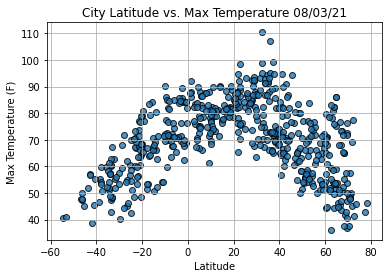

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

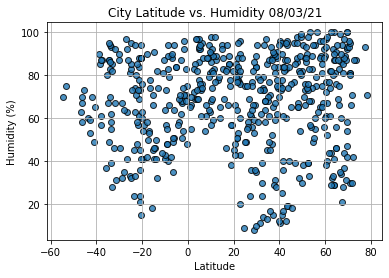

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

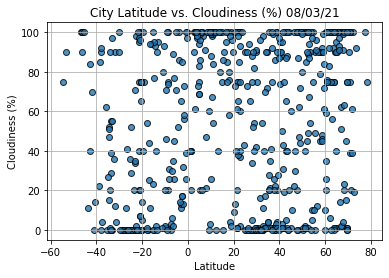

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

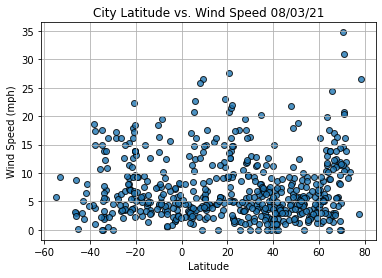

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()